<a href="https://colab.research.google.com/github/rachelhostetler/ABCAtlas_UseCases/blob/main/Plotting_MERFISH_imputed_gene_expression_in_NT_and_region_subset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Allen Brain Cell Atlas Use Case
This notebook is an example of how to use data from the Allen Brain Cell (ABC) Atas. Code for this notebook comes from [ABC Atlas Access](https://alleninstitute.github.io/abc_atlas_access/intro.html), which features in depth tutorials on ABC Atlas scRNAseq and MERFISH datasets. Use ABC Atlas Access to learn more about each of the datasets. The text following '#' are comments and/or indicate where the code can be edited to look at different brain regions, cell types, etc. This notebook is intended to be used in Google Colab.
## Use Case Description
A scientist studies acetylcholine and memory in mice. They are looking at the CA1 region of the hippocampus, and want to know the gene expression values of Chrna7 and Chrm1 in glutamatergic neurons. Using the ABC Atlas, they are looking at spatial transcriptomic mouse data— their genes of interest were not in the orginal 500-gene panel, however, they find their genes in the imputed gene dataset (from scRNAseq data). This dataset is titled "MERFISH-C57BL6J-638850 with Imputed Genes + Reconstructed Coordinates." [Here](https://knowledge.brain-map.org/abcatlas#AQEBSzlKTjIzUDI0S1FDR0s5VTc1QQACSFNZWlBaVzE2NjlVODIxQldZUAADBAE0TVY3SEE1REcyWEpaM1VEOEc5AAIBR2x1dAAAATczR1ZURFhERUdFMjdNMlhKTVQAAgAAAUk5TE5QME8xUk44SzRTTjJHV1kAAgFDQTEAAAFURlFGTE5FUDNWMjIyWTg4QzY0AAIAAAQBAAKCdtVCg3oWcwOCLM2egqrYLgQyTlFUSUU3VEFNUDhQUUFITzRQAAWBr6ZKgemsDoGggUeAktXoBgAHAAAFAgFDaHJuYTcAAAFDaHJtMQAABgEAAkNocm5hNwADfgAAAAQABXUAgC%2BCAIAuBshTBwIjRkZGRkZGAAMABkdFTkUABwAIAgAACFZGT0ZZUEZRR1JLVURRVVozRkYACUxWREJKQVc4Qkk1WVNTMVFVQkcACgALAVRMT0tXQ0w5NVJVMDNEOVBFVEcAAjczR1ZURFhERUdFMjdNMlhKTVQAAwEEAQACIzAwMDAwMAADyAEABQEBAiMwMDAwMDAAA8gBAAAAAgEA) are the cells and genes they are studying in the ABC Atlas.

Goal: plot gene expression of imputed genes Chrna7 and Chrm1 in glutamatergic neurons in CA1.

In [ ]:
# Install s3fs package
!apt install s3fs

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
s3fs is already the newest version (1.90-1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [ ]:
# Make directory to mount s3 data into
!mkdir -p /data/abc_atlas

In [ ]:
# Mount the s3 bucket using s3fs-fuse
!s3fs -o public_bucket=1 -o default_acl=public-read -o endpoint="us-west-2" allen-brain-cell-atlas /data/abc_atlas

s3fs: MOUNTPOINT directory /data/abc_atlas is not empty. if you are sure this is safe, can use the 'nonempty' mount option.


In [ ]:
# Check that it's mounted
!ls -ltrh /data/abc_atlas

total 35K
drwxr-x--- 1 root root   0 Dec 31  1969 releases
drwxr-x--- 1 root root   0 Dec 31  1969 metadata
drwxr-x--- 1 root root   0 Dec 31  1969 mapmycells
drwxr-x--- 1 root root   0 Dec 31  1969 image_volumes
drwxr-x--- 1 root root   0 Dec 31  1969 expression_matrices
-rw-r----- 1 root root 32K Jun  7  2023 index.html


In [ ]:
# Install abc_atlas_access
%pip install "abc_atlas_access[notebooks] @ git+https://github.com/alleninstitute/abc_atlas_access.git"

  Cloning https://github.com/alleninstitute/abc_atlas_access.git to /tmp/pip-install-soamngj1/abc-atlas-access_ffd07a1c94ed4d80be78ff5d2856ed56
  Running command git clone --filter=blob:none --quiet https://github.com/alleninstitute/abc_atlas_access.git /tmp/pip-install-soamngj1/abc-atlas-access_ffd07a1c94ed4d80be78ff5d2856ed56
  Resolved https://github.com/alleninstitute/abc_atlas_access.git to commit a82a6770c99ad166105c3e6fccd47f31ee69b44c
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
from pathlib import Path
from abc_atlas_access.abc_atlas_cache.abc_project_cache import AbcProjectCache

In [ ]:
download_base = Path('/data/abc_atlas')
abc_cache = AbcProjectCache.from_local_cache(download_base)

abc_cache.current_manifest

/usr/local/lib/python3.11/dist-packages/abc_atlas_access/abc_atlas_cache/cloud_cache.py:470: MissingLocalManifestWarning: This cache directory appears to contain data files, but it has no record of what those files are. Unless running as a LocalCache, files will be re-downloaded.
  warnings.warn(msg, MissingLocalManifestWarning)
/usr/local/lib/python3.11/dist-packages/abc_atlas_access/abc_atlas_cache/cloud_cache.py:1373: ReadOnlyLocalCacheWarning: LocalCache is a read only directory and cannot
                save the last used manifest.
                Current Manifest: releases/20250531/manifest.json
  warnings.warn(


'releases/20250531/manifest.json'

In [ ]:
abc_cache.list_directories

['ASAP-PMDBS-10X',
 'ASAP-PMDBS-taxonomy',
 'Allen-CCF-2020',
 'HMBA-10xMultiome-BG',
 'HMBA-10xMultiome-BG-Aligned',
 'HMBA-BG-taxonomy-CCN20250428',
 'MERFISH-C57BL6J-638850',
 'MERFISH-C57BL6J-638850-CCF',
 'MERFISH-C57BL6J-638850-imputed',
 'MERFISH-C57BL6J-638850-sections',
 'SEAAD',
 'SEAAD-taxonomy',
 'WHB-10Xv3',
 'WHB-taxonomy',
 'WMB-10X',
 'WMB-10XMulti',
 'WMB-10Xv2',
 'WMB-10Xv3',
 'WMB-neighborhoods',
 'WMB-taxonomy',
 'Zeng-Aging-Mouse-10Xv3',
 'Zeng-Aging-Mouse-WMB-taxonomy',
 'Zhuang-ABCA-1',
 'Zhuang-ABCA-1-CCF',
 'Zhuang-ABCA-2',
 'Zhuang-ABCA-2-CCF',
 'Zhuang-ABCA-3',
 'Zhuang-ABCA-3-CCF',
 'Zhuang-ABCA-4',
 'Zhuang-ABCA-4-CCF']

In [ ]:
import pandas as pd
from pathlib import Path
import numpy as np
import anndata
import matplotlib.pyplot as plt
import matplotlib as mpl

from abc_atlas_access.abc_atlas_cache.abc_project_cache import AbcProjectCache

In [ ]:
# Edit the notebook from here onward
# Load metadata for cell dataset
cell = abc_cache.get_metadata_dataframe(
    directory='MERFISH-C57BL6J-638850', # To change dataset, enter the directory name from the list above (abc_cache.list_directories). If using imputed genes, use 'MERFISH-C57BL6J-638850'
    file_name='cell_metadata_with_cluster_annotation',
    dtype={"cell_label": str,
           "neurotransmitter": str}
)
cell.set_index('cell_label', inplace=True)

In [ ]:
# filter cells for neurotransmitter type and show first 5 cells in table
NT_cells = cell[cell['neurotransmitter'] == 'Glut'] # 'Glut' change neurotransmitter here
NT_cells.head(5)

,brain_section_label,cluster_alias,average_correlation_score,feature_matrix_label,donor_label,donor_genotype,donor_sex,x,y,z,neurotransmitter,class,subclass,supertype,cluster,neurotransmitter_color,class_color,subclass_color,supertype_color,cluster_color
cell_label,,,,,,,,,,,,,,,,,,,,
1104095349101460194-1,C57BL6J-638850.26,4218,0.641180,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.064889,7.309543,4.2,Glut,23 P Glut,235 PG-TRN-LRN Fat2 Glut,0953 PG-TRN-LRN Fat2 Glut_1,4199 PG-TRN-LRN Fat2 Glut_1,#2B93DF,#6b5ca5,#9B7ACC,#990041,#663D63
1017092617101450577,C57BL6J-638850.25,4218,0.763531,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.792921,8.189973,4.0,Glut,23 P Glut,235 PG-TRN-LRN Fat2 Glut,0953 PG-TRN-LRN Fat2 Glut_1,4199 PG-TRN-LRN Fat2 Glut_1,#2B93DF,#6b5ca5,#9B7ACC,#990041,#663D63
1018093344101130233,C57BL6J-638850.13,4218,0.558073,C57BL6J-638850,C57BL6J-638850,wt/wt,M,3.195950,5.868655,2.4,Glut,23 P Glut,235 PG-TRN-LRN Fat2 Glut,0953 PG-TRN-LRN Fat2 Glut_1,4199 PG-TRN-LRN Fat2 Glut_1,#2B93DF,#6b5ca5,#9B7ACC,#990041,#663D63
1019171912201610094,C57BL6J-638850.27,4218,0.591009,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.635732,7.995842,4.4,Glut,23 P Glut,235 PG-TRN-LRN Fat2 Glut,0953 PG-TRN-LRN Fat2 Glut_1,4199 PG-TRN-LRN Fat2 Glut_1,#2B93DF,#6b5ca5,#9B7ACC,#990041,#663D63
1017092617101300312,C57BL6J-638850.25,4218,0.708851,C57BL6J-638850,C57BL6J-638850,wt/wt,M,4.978776,7.843046,4.0,Glut,23 P Glut,235 PG-TRN-LRN Fat2 Glut,0953 PG-TRN-LRN Fat2 Glut_1,4199 PG-TRN-LRN Fat2 Glut_1,#2B93DF,#6b5ca5,#9B7ACC,#990041,#663D63


In [ ]:
# get reconstructed x,y,z coordinates for each cell — this is needed anatomical regions. Show first 5 cells in table
reconstructed_coords = abc_cache.get_metadata_dataframe(
    directory='MERFISH-C57BL6J-638850-CCF',
    file_name='reconstructed_coordinates',
    dtype={"cell_label": str}
)
reconstructed_coords.rename(columns={'x': 'x_reconstructed',
                                     'y': 'y_reconstructed',
                                     'z': 'z_reconstructed'},
                            inplace=True)
reconstructed_coords.set_index('cell_label', inplace=True)
reconstructed_coords.head(5)

,x_reconstructed,y_reconstructed,z_reconstructed,parcellation_index
cell_label,,,,
1019171911101460569,7.143894,7.890964,0.8,945
1019171911101550321,4.188673,7.962972,0.8,945
1019171911100841066,6.859447,5.908534,0.8,893
1019171911101400425,3.952014,7.564086,0.8,842
1019171911101380264,2.803546,7.221688,0.8,0


In [ ]:
# add coordinates for each cell to table and show first 5 cells in table
cell_joined = NT_cells.join(reconstructed_coords, how='inner')
cell_joined.head(5)

,brain_section_label,cluster_alias,average_correlation_score,feature_matrix_label,donor_label,donor_genotype,donor_sex,x,y,z,...,cluster,neurotransmitter_color,class_color,subclass_color,supertype_color,cluster_color,x_reconstructed,y_reconstructed,z_reconstructed,parcellation_index
cell_label,,,,,,,,,,,,,,,,,,,,,
1104095349101460194-1,C57BL6J-638850.26,4218,0.641180,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.064889,7.309543,4.2,...,4199 PG-TRN-LRN Fat2 Glut_1,#2B93DF,#6b5ca5,#9B7ACC,#990041,#663D63,5.036436,7.264429,4.2,564
1017092617101450577,C57BL6J-638850.25,4218,0.763531,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.792921,8.189973,4.0,...,4199 PG-TRN-LRN Fat2 Glut_1,#2B93DF,#6b5ca5,#9B7ACC,#990041,#663D63,5.784270,8.007646,4.0,761
1018093344101130233,C57BL6J-638850.13,4218,0.558073,C57BL6J-638850,C57BL6J-638850,wt/wt,M,3.195950,5.868655,2.4,...,4199 PG-TRN-LRN Fat2 Glut_1,#2B93DF,#6b5ca5,#9B7ACC,#990041,#663D63,3.161528,5.719814,2.4,718
1019171912201610094,C57BL6J-638850.27,4218,0.591009,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.635732,7.995842,4.4,...,4199 PG-TRN-LRN Fat2 Glut_1,#2B93DF,#6b5ca5,#9B7ACC,#990041,#663D63,5.618763,7.847877,4.4,761
1017092617101300312,C57BL6J-638850.25,4218,0.708851,C57BL6J-638850,C57BL6J-638850,wt/wt,M,4.978776,7.843046,4.0,...,4199 PG-TRN-LRN Fat2 Glut_1,#2B93DF,#6b5ca5,#9B7ACC,#990041,#663D63,4.945694,7.763625,4.0,564


In [ ]:
# get anatomical regions and show first 5 cells in table
parcellation_annotation = abc_cache.get_metadata_dataframe(directory='Allen-CCF-2020',
                                                           file_name='parcellation_to_parcellation_term_membership_acronym')
parcellation_annotation.set_index('parcellation_index', inplace=True)
parcellation_annotation.columns = ['parcellation_%s'% x for x in  parcellation_annotation.columns]
parcellation_annotation.head(5)

,parcellation_organ,parcellation_category,parcellation_division,parcellation_structure,parcellation_substructure
parcellation_index,,,,,
0,unassigned,unassigned,unassigned,unassigned,unassigned
1,brain,grey,HY,TMv,TMv
2,brain,grey,Isocortex,SSp-m,SSp-m6b
5,brain,fiber tracts,lfbs,cst,int
6,brain,grey,P,PSV,PSV


In [ ]:
parcellation_color = abc_cache.get_metadata_dataframe(directory='Allen-CCF-2020',
                                                      file_name='parcellation_to_parcellation_term_membership_color')
parcellation_color.set_index('parcellation_index', inplace=True)
parcellation_color.columns = ['parcellation_%s'% x for x in  parcellation_color.columns]
parcellation_color.head(5)

,parcellation_organ_color,parcellation_category_color,parcellation_division_color,parcellation_structure_color,parcellation_substructure_color
parcellation_index,,,,,
0,#000000,#000000,#000000,#000000,#000000
1,#FFFFFF,#BFDAE3,#E64438,#FF4C3E,#FF4C3E
2,#FFFFFF,#BFDAE3,#70FF71,#188064,#188064
5,#FFFFFF,#CCCCCC,#CCCCCC,#CCCCCC,#CCCCCC
6,#FFFFFF,#BFDAE3,#FF9B88,#FFAE6F,#FFAE6F


In [ ]:
# add anatomical regions to table and show first 5 cells in table
cell_joined = cell_joined.join(parcellation_annotation, on='parcellation_index')
cell_joined.head(5)

,brain_section_label,cluster_alias,average_correlation_score,feature_matrix_label,donor_label,donor_genotype,donor_sex,x,y,z,...,cluster_color,x_reconstructed,y_reconstructed,z_reconstructed,parcellation_index,parcellation_organ,parcellation_category,parcellation_division,parcellation_structure,parcellation_substructure
cell_label,,,,,,,,,,,,,,,,,,,,,
1104095349101460194-1,C57BL6J-638850.26,4218,0.641180,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.064889,7.309543,4.2,...,#663D63,5.036436,7.264429,4.2,564,brain,grey,P,TRN,TRN
1017092617101450577,C57BL6J-638850.25,4218,0.763531,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.792921,8.189973,4.0,...,#663D63,5.784270,8.007646,4.0,761,brain,grey,P,P-unassigned,P-unassigned
1018093344101130233,C57BL6J-638850.13,4218,0.558073,C57BL6J-638850,C57BL6J-638850,wt/wt,M,3.195950,5.868655,2.4,...,#663D63,3.161528,5.719814,2.4,718,brain,fiber tracts,cbf,arb,arb
1019171912201610094,C57BL6J-638850.27,4218,0.591009,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.635732,7.995842,4.4,...,#663D63,5.618763,7.847877,4.4,761,brain,grey,P,P-unassigned,P-unassigned
1017092617101300312,C57BL6J-638850.25,4218,0.708851,C57BL6J-638850,C57BL6J-638850,wt/wt,M,4.978776,7.843046,4.0,...,#663D63,4.945694,7.763625,4.0,564,brain,grey,P,TRN,TRN


In [ ]:
# filter for cells in anatomical division and show first 5 cells in table
cell_joined[cell_joined["parcellation_structure"]== 'CA1']
# 'CA1' change anatomical division here, 'parcellation_structure' change anatomical level here
# from ABC Atlas, anatomical division = parcellation_division, anatomical structure = parcellation_structure, anatomical substructure = parcellation_substructure
cell_joined.head(5)

,brain_section_label,cluster_alias,average_correlation_score,feature_matrix_label,donor_label,donor_genotype,donor_sex,x,y,z,...,cluster_color,x_reconstructed,y_reconstructed,z_reconstructed,parcellation_index,parcellation_organ,parcellation_category,parcellation_division,parcellation_structure,parcellation_substructure
cell_label,,,,,,,,,,,,,,,,,,,,,
1104095349101460194-1,C57BL6J-638850.26,4218,0.641180,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.064889,7.309543,4.2,...,#663D63,5.036436,7.264429,4.2,564,brain,grey,P,TRN,TRN
1017092617101450577,C57BL6J-638850.25,4218,0.763531,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.792921,8.189973,4.0,...,#663D63,5.784270,8.007646,4.0,761,brain,grey,P,P-unassigned,P-unassigned
1018093344101130233,C57BL6J-638850.13,4218,0.558073,C57BL6J-638850,C57BL6J-638850,wt/wt,M,3.195950,5.868655,2.4,...,#663D63,3.161528,5.719814,2.4,718,brain,fiber tracts,cbf,arb,arb
1019171912201610094,C57BL6J-638850.27,4218,0.591009,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.635732,7.995842,4.4,...,#663D63,5.618763,7.847877,4.4,761,brain,grey,P,P-unassigned,P-unassigned
1017092617101300312,C57BL6J-638850.25,4218,0.708851,C57BL6J-638850,C57BL6J-638850,wt/wt,M,4.978776,7.843046,4.0,...,#663D63,4.945694,7.763625,4.0,564,brain,grey,P,TRN,TRN


In [ ]:
# get gene expression values from cell dataset
imputed_h5ad_path = abc_cache.get_data_path('MERFISH-C57BL6J-638850-imputed', 'C57BL6J-638850-imputed/log2')
# change cell dataset here.
adata = anndata.read_h5ad(imputed_h5ad_path, backed='r')
gene_list = ['Chrna7', 'Chrm1'] # edit genes here

In [ ]:
# get ensemble IDs of genes of interest
pred = [x in gene_list for x in adata.var.gene_symbol]
gene_filtered = adata.var[pred]
gene_filtered

,gene_symbol
gene_identifier,
ENSMUSG00000032773,Chrm1
ENSMUSG00000030525,Chrna7


In [ ]:
# get gene expression values for genes of interest and show first 5 cells in table
gene_subset = adata[:, gene_filtered.index].to_df()
adata.file.close()
del adata

gene_subset.rename(columns=gene_filtered.to_dict()['gene_symbol'], inplace=True)
gene_subset.head(5)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


gene_identifier,Chrm1,Chrna7
cell_label,,
1104095349100540743-1,6.687500,3.759766
1018093345100600265,6.695312,3.943359
1018135614102090183,6.781250,4.054688
1104095348100570634,6.695312,3.687500
1018122109102452991,6.785156,3.652344


In [ ]:
# add genes of interest to cell table
genes_of_interest = cell_joined.join(gene_subset, on='cell_label', how='inner')

In [ ]:
# filter cell table for anatomical region
cell_table = genes_of_interest[genes_of_interest["parcellation_structure"]== 'CA1']
# 'CA1' change anatomical region here, 'parcellation_structure' change anatomical level here

In [ ]:
# show all metadata for first 5 cells
cell_table.head(5)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,brain_section_label,cluster_alias,average_correlation_score,feature_matrix_label,donor_label,donor_genotype,donor_sex,x,y,z,...,y_reconstructed,z_reconstructed,parcellation_index,parcellation_organ,parcellation_category,parcellation_division,parcellation_structure,parcellation_substructure,Chrm1,Chrna7
cell_label,,,,,,,,,,,,,,,,,,,,,
1019171907102020573-1,C57BL6J-638850.40,2762,0.602953,C57BL6J-638850,C57BL6J-638850,wt/wt,M,4.440715,3.733536,7.2,...,3.688944,7.2,381,brain,grey,HPF,CA1,CA1slm,0.094910,0.058258
1018093345100550251,C57BL6J-638850.31,2762,0.640508,C57BL6J-638850,C57BL6J-638850,wt/wt,M,8.741160,6.306166,5.4,...,5.992561,5.4,381,brain,grey,HPF,CA1,CA1slm,0.110229,0.059967
1018093345100550258,C57BL6J-638850.31,2762,0.522631,C57BL6J-638850,C57BL6J-638850,wt/wt,M,8.742109,6.269238,5.4,...,5.953292,5.4,381,brain,grey,HPF,CA1,CA1slm,0.096680,0.081543
1018093345100720338,C57BL6J-638850.31,2762,0.658085,C57BL6J-638850,C57BL6J-638850,wt/wt,M,8.222988,6.902258,5.4,...,6.572271,5.4,381,brain,grey,HPF,CA1,CA1slm,0.099060,0.048004
1104095349100720308-1,C57BL6J-638850.32,2762,0.597628,C57BL6J-638850,C57BL6J-638850,wt/wt,M,2.318787,5.598264,5.6,...,4.803179,5.6,381,brain,grey,HPF,CA1,CA1slm,0.711914,0.003412


In [ ]:
# Filter data by specific brain section
use_section_filter = False # change "False" to "True" if you want to filter for a specific brain section. Leave "False" if you do NOT want to filter.
if use_section_filter:
  cell_table = cell_table[cell_table["brain_section_label"] == "C57BL6J-638850.31"] # "C57BL6J-638850.31" edit brain section filter here
else:
  print("Brain section filter not used.")

cell_table

Brain section filter not used.


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,brain_section_label,cluster_alias,average_correlation_score,feature_matrix_label,donor_label,donor_genotype,donor_sex,x,y,z,...,y_reconstructed,z_reconstructed,parcellation_index,parcellation_organ,parcellation_category,parcellation_division,parcellation_structure,parcellation_substructure,Chrm1,Chrna7
cell_label,,,,,,,,,,,,,,,,,,,,,
1019171907102020573-1,C57BL6J-638850.40,2762,0.602953,C57BL6J-638850,C57BL6J-638850,wt/wt,M,4.440715,3.733536,7.2,...,3.688944,7.2,381,brain,grey,HPF,CA1,CA1slm,0.094910,0.058258
1018093345100550251,C57BL6J-638850.31,2762,0.640508,C57BL6J-638850,C57BL6J-638850,wt/wt,M,8.741160,6.306166,5.4,...,5.992561,5.4,381,brain,grey,HPF,CA1,CA1slm,0.110229,0.059967
1018093345100550258,C57BL6J-638850.31,2762,0.522631,C57BL6J-638850,C57BL6J-638850,wt/wt,M,8.742109,6.269238,5.4,...,5.953292,5.4,381,brain,grey,HPF,CA1,CA1slm,0.096680,0.081543
1018093345100720338,C57BL6J-638850.31,2762,0.658085,C57BL6J-638850,C57BL6J-638850,wt/wt,M,8.222988,6.902258,5.4,...,6.572271,5.4,381,brain,grey,HPF,CA1,CA1slm,0.099060,0.048004
1104095349100720308-1,C57BL6J-638850.32,2762,0.597628,C57BL6J-638850,C57BL6J-638850,wt/wt,M,2.318787,5.598264,5.6,...,4.803179,5.6,381,brain,grey,HPF,CA1,CA1slm,0.711914,0.003412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018093344100520547-2,C57BL6J-638850.30,362,0.512769,C57BL6J-638850,C57BL6J-638850,wt/wt,M,1.858030,5.293552,5.0,...,4.521547,5.0,389,brain,grey,HPF,CA1,CA1so,7.132812,4.625000
1018093345100670083,C57BL6J-638850.31,91,0.510281,C57BL6J-638850,C57BL6J-638850,wt/wt,M,8.801686,4.419850,5.4,...,4.055629,5.4,389,brain,grey,HPF,CA1,CA1so,5.574219,2.460938
1018093345102360229,C57BL6J-638850.31,366,0.518039,C57BL6J-638850,C57BL6J-638850,wt/wt,M,3.154427,7.773162,5.4,...,7.160532,5.4,389,brain,grey,HPF,CA1,CA1so,5.972656,3.251953


In [ ]:
# just show gene expression values from previous table for first 5 cells.
# Double check number of cells in table with expected number in ABC Atlas.
gene_table = (cell_table[['Chrna7', 'Chrm1']]) # edit genes of interest here
gene_table

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,Chrna7,Chrm1
cell_label,,
1019171907102020573-1,0.058258,0.094910
1018093345100550251,0.059967,0.110229
1018093345100550258,0.081543,0.096680
1018093345100720338,0.048004,0.099060
1104095349100720308-1,0.003412,0.711914
...,...,...
1018093344100520547-2,4.625000,7.132812
1018093345100670083,2.460938,5.574219
1018093345102360229,3.251953,5.972656


In [ ]:
# save gene expression table as csv. saved file will appear in 'files' tab on the left sidebar
gene_table.to_csv('gene_table.csv')


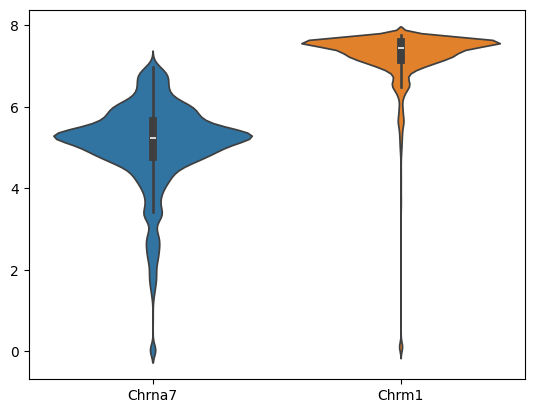

In [ ]:
# create violin plot of gene table

import seaborn as sns

sns.violinplot(data=gene_table)
plt.show()
